In [1]:
import torch
from torch import nn
from torch.nn import Parameter
from torch import relu
import torch.nn.functional as F
import numpy as np

from typing import Union, Tuple, List, Optional
from torch import Tensor


In [3]:
z = torch.rand(5, 5)
z

tensor([[0.6311, 0.9110, 0.4161, 0.0150, 0.7657],
        [0.8436, 0.0289, 0.4260, 0.5163, 0.0650],
        [0.6256, 0.4678, 0.3333, 0.2102, 0.6123],
        [0.6423, 0.5985, 0.3095, 0.1311, 0.7163],
        [0.2522, 0.3331, 0.5371, 0.3584, 0.0545]])

In [6]:
norm_z = z - z.mean(dim=0)
norm_z = F.normalize(norm_z, p=2, dim=0)
norm_z

tensor([[ 7.5044e-02,  6.8036e-01,  6.5233e-02, -5.9005e-01,  4.5603e-01],
        [ 5.7079e-01, -6.7390e-01,  1.2000e-01,  6.8932e-01, -5.3353e-01],
        [ 6.2118e-02, -1.1493e-04, -3.9576e-01, -9.1914e-02,  2.3952e-01],
        [ 1.0106e-01,  2.0048e-01, -5.2821e-01, -2.9367e-01,  3.8637e-01],
        [-8.0901e-01, -2.0682e-01,  7.3873e-01,  2.8631e-01, -5.4839e-01]])

In [12]:
fxf_cov_z = torch.mm(norm_z.T, norm_z)
ind = np.diag_indices(fxf_cov_z.shape[0])
fxf_cov_z[ind[0], ind[1]] = torch.zeros(fxf_cov_z.shape[0]).to(norm_z.device)

fxf_cov_z, fxf_cov_z**2, torch.mm(fxf_cov_z, fxf_cov_z)

(tensor([[ 0.0000, -0.1460, -0.6022,  0.0822,  0.2273],
         [-0.1460,  0.0000, -0.2951, -0.9841,  0.8607],
         [-0.6022, -0.2951,  0.0000,  0.4472, -0.7383],
         [ 0.0822, -0.9841,  0.4472,  0.0000, -0.9294],
         [ 0.2273,  0.8607, -0.7383, -0.9294,  0.0000]]),
 tensor([[0.0000, 0.0213, 0.3627, 0.0067, 0.0517],
         [0.0213, 0.0000, 0.0871, 0.9684, 0.7407],
         [0.3627, 0.0871, 0.0000, 0.2000, 0.5450],
         [0.0067, 0.9684, 0.2000, 0.0000, 0.8637],
         [0.0517, 0.7407, 0.5450, 0.8637, 0.0000]]),
 tensor([[ 0.4424,  0.2925, -0.0879, -0.3368,  0.2426],
         [ 0.2925,  1.8175, -0.9876, -0.9438,  1.0992],
         [-0.0879, -0.9876,  1.1948,  0.9270, -0.8065],
         [-0.3368, -0.9438,  0.9270,  2.0388, -1.1585],
         [ 0.2426,  1.0992, -0.8065, -1.1585,  2.2011]]))

In [ ]:
def compute_cov_loss(z: Tensor):
    norm_z = z - z.mean(dim=0)
    norm_z = F.normalize(norm_z, p=2, dim=0)  # (batch * feature); l2-norm
    fxf_cov_z = torch.mm(norm_z.T, norm_z)  # (feature * feature)
    ind = np.diag_indices(fxf_cov_z.shape[0])
    fxf_cov_z[ind[0], ind[1]] = torch.zeros(fxf_cov_z.shape[0]).to(norm_z.device)
    cov_loss = (fxf_cov_z**2).mean()
    return cov_loss

/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_15430/1168505905.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, covariance_matrix, 1000)


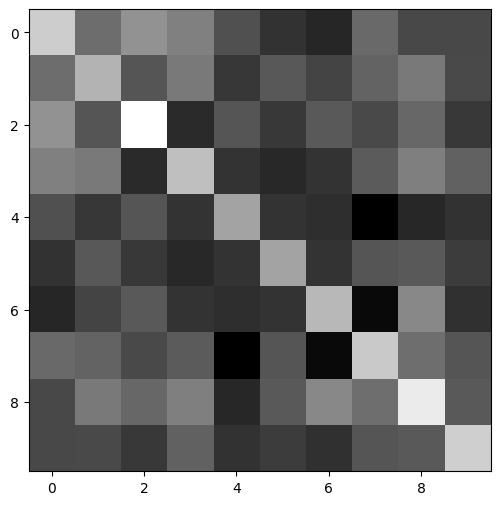

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
mean = np.zeros(10)
covariance_matrix = np.random.rand(10, 10)  # Random covariance matrix for illustration
data = np.random.multivariate_normal(mean, covariance_matrix, 1000)

# Calculate covariance matrix
cov_matrix = np.cov(data, rowvar=False)


# Plot covariance matrix
plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap='gray', origin='upper')
# plt.colorbar(label='Covariance')
# plt.title('10x10 Covariance Matrix')
# plt.xlabel('Variables')
# plt.ylabel('Variables')
plt.show()

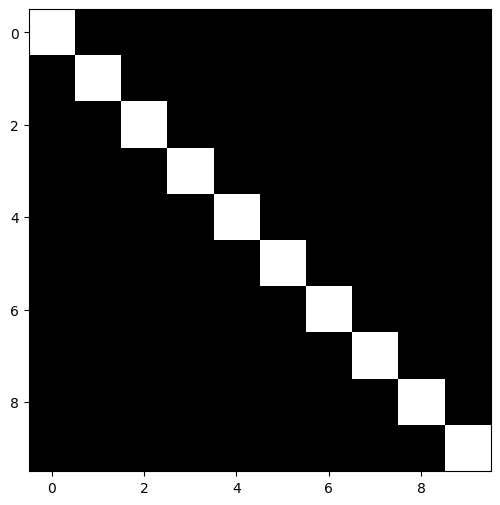

In [24]:
identity_matrix = np.eye(10)
plt.figure(figsize=(8, 6))
plt.imshow(identity_matrix, cmap='gray', origin='upper')
# plt.colorbar(label='Covariance')
# plt.title('10x10 Covariance Matrix')
# plt.xlabel('Variables')
# plt.ylabel('Variables')
plt.show()